In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 5,
                      "train_percentage" : 0.5,
                      "num_val_benchmarks" : 5,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 5,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 6),
                "ewc_lambda" : (200,1000)}
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list, model = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-09 17:28:13,882] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.15it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5336
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8510
100%|██████████| 235/235 [00:03<00:00, 65.65it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1889
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9451
100%|██████████| 235/235 [00:03<00:00, 69.86it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1326
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9614
100%|██████████| 235/235 [00:03<00:00, 70.77it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1086
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9681
100%|██████████| 235/235 [00:03<00:00, 73.74it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0939
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9709
-- >> End o

[I 2024-07-09 17:28:34,373] Trial 0 finished with value: 93.35314893617021 and parameters: {'num_epochs': 5, 'ewc_lambda': 606}. Best is trial 0 with value: 93.35314893617021.


-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 74.64it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5444
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8496
100%|██████████| 235/235 [00:03<00:00, 69.92it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1815
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9466
100%|██████████| 235/235 [00:03<00:00, 72.33it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1305
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9609
 19%|█▉        | 45/235 [00:00<00:02, 72.31it/s]

[W 2024-07-09 17:28:44,828] Trial 1 failed with parameters: {'num_epochs': 4, 'ewc_lambda': 917} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/mathis/miniconda3/envs/.jax_env/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/home/mathis/Master-Thesis-1/Workspace/Core work/HPO_lib/run_HPO.py", line 49, in objective
    _ = train(model_copy, method_settings, params, HPs, train_loader, device, global_seed)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mathis/Master-Thesis-1/Workspace/Core work/Methods/EWC/lib/method.py", line 54, in train
    ewc.train(experience)
  File "/home/mathis/miniconda3/envs/.jax_env/lib/python3.12/site-packages/avalanche/training/templates/base_sgd.py", line 211, in train
    super().train(experiences, eval_streams, **kwargs)
  File "/home/mat

KeyboardInterrupt: 

 19%|█▉        | 45/235 [00:19<00:02, 72.31it/s]

## Visualize results

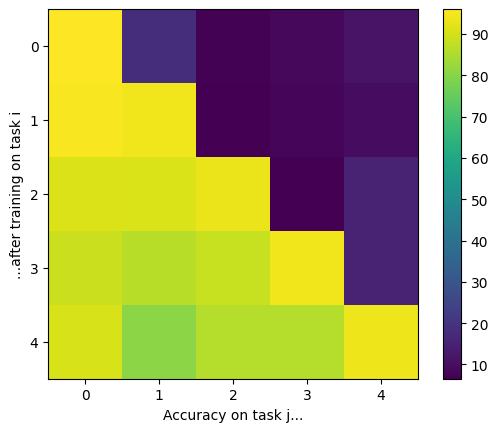

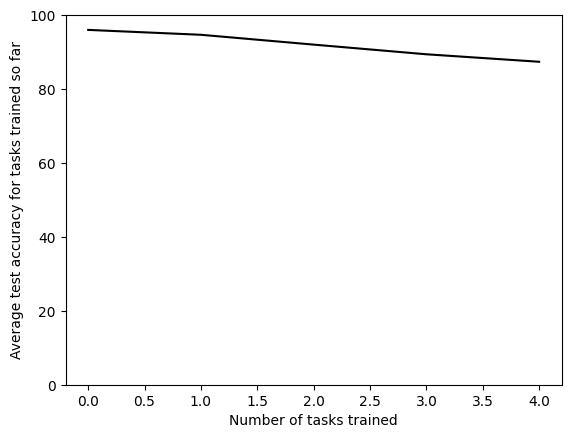

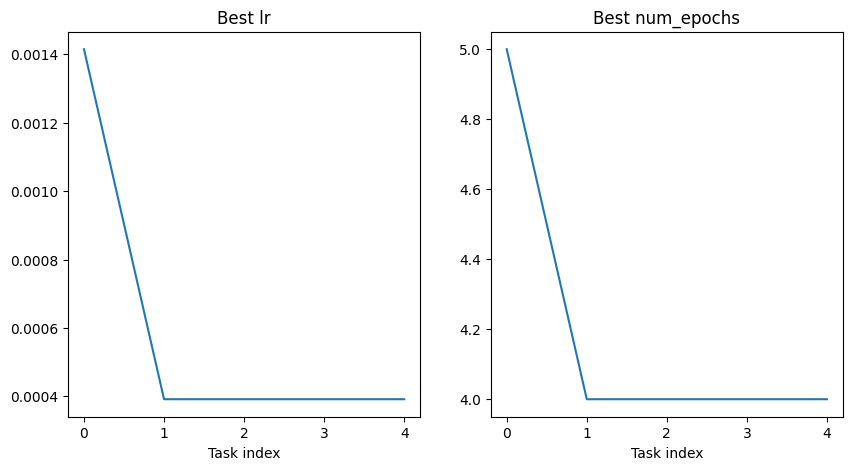

In [ ]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [ ]:
val_accs_matrix = validate(benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:13,  3.42s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:10,  3.41s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:10<00:06,  3.44s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:13<00:03,  3.44s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:17<00:00,  3.45s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.46s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.46s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.44s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.44s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.52s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.51s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.48s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.52s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.60s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.61s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.62s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.61s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.59s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.58s/it]

In and out sizes :
fc1 : in = 784, out = 166
fc2 : in = 166, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.58s/it]

In and out sizes :
fc1 : in = 784, out = 166
fc2 : in = 166, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.58s/it]



BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:14,  3.53s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:07<00:10,  3.55s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:10<00:07,  3.53s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:14<00:03,  3.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:17<00:00,  3.58s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.55s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.60s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.67s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.55s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.53s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.52s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.52s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.61s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.57s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.60s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.59s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.58s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.61s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.59s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.60s/it]



BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:14,  3.73s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:07<00:11,  3.73s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:11<00:07,  3.65s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:14<00:03,  3.60s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:18<00:00,  3.62s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.55s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.55s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.54s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.54s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.56s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.56s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.55s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.55s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.55s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.56s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.55s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.54s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.54s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.54s/it]



BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:14,  3.54s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:07<00:10,  3.51s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:10<00:07,  3.51s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:14<00:03,  3.54s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:17<00:00,  3.52s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.51s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.52s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.51s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.51s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.49s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.50s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.52s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.52s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.60s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.63s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.67s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.67s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:11,  3.74s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:07<00:07,  3.62s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.59s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:14<00:00,  3.55s/it]


## Visualize validation

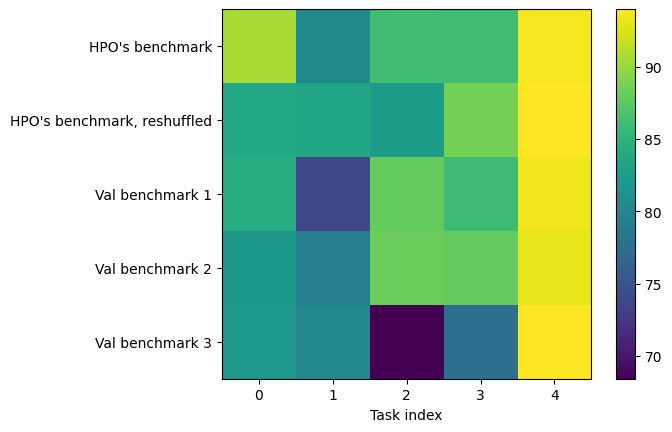

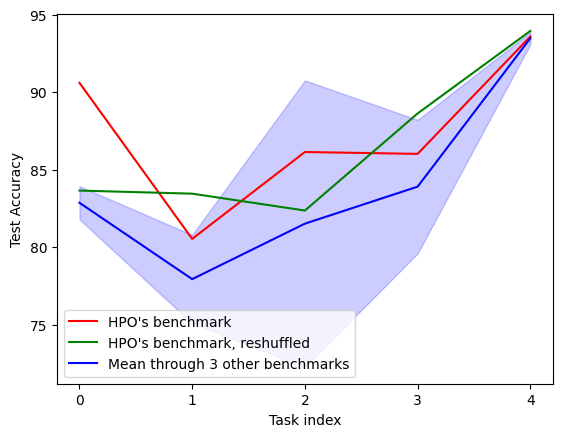

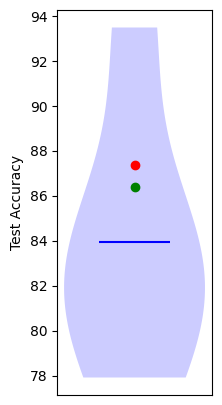

In [ ]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [ ]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)